In [2]:
#!pip install citipy
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

517

In [59]:
WeatherData = []

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for x in cities:
    
    CityUrl = url + "&q=" + x
    
    
    try:
        Weather = requests.get(CityUrl).json()
    
        # Parse out the max temp, humidity, and cloudiness
        CityLat = Weather["coord"]["lat"]
        CityLong = Weather["coord"]["lon"]
        CityTemp = Weather["main"]["temp_max"]
        CityHumidity = Weather["main"]["humidity"]
        CityClouds = Weather["clouds"]["all"]
        CityWind = Weather["wind"]["speed"]
      
        
        
        WeatherData.append({"City": x, 
                          "Lat": CityLat, 
                          "Lng": CityLong, 
                          "Max Temp": CityTemp,
                          "Humidity": CityHumidity,
                          "Cloudiness": CityClouds,
                          "Wind Speed": CityWind,
                          "Country": CityCountry})
        
        
    except:
        
        pass

print (WeatherData)
                          
    

[{'City': 'port lincoln', 'Lat': -34.72, 'Lng': 135.86, 'Max Temp': 70.96, 'Humidity': 64, 'Cloudiness': 12, 'Wind Speed': 3.6, 'Country': 'NO'}, {'City': 'saint george', 'Lat': 39.45, 'Lng': 22.34, 'Max Temp': 51.8, 'Humidity': 87, 'Cloudiness': 75, 'Wind Speed': 6.93, 'Country': 'NO'}, {'City': 'bluff', 'Lat': -23.58, 'Lng': 149.07, 'Max Temp': 89.91, 'Humidity': 24, 'Cloudiness': 0, 'Wind Speed': 9.01, 'Country': 'NO'}, {'City': 'kodiak', 'Lat': 39.95, 'Lng': -94.76, 'Max Temp': 15.08, 'Humidity': 80, 'Cloudiness': 1, 'Wind Speed': 6.73, 'Country': 'NO'}, {'City': 'rikitea', 'Lat': -23.12, 'Lng': -134.97, 'Max Temp': 70.83, 'Humidity': 100, 'Cloudiness': 8, 'Wind Speed': 13.11, 'Country': 'NO'}, {'City': 'tateyama', 'Lat': 36.66, 'Lng': 137.31, 'Max Temp': 66.2, 'Humidity': 52, 'Cloudiness': 75, 'Wind Speed': 3.36, 'Country': 'NO'}, {'City': 'hithadhoo', 'Lat': -0.6, 'Lng': 73.08, 'Max Temp': 83.74, 'Humidity': 100, 'Cloudiness': 80, 'Wind Speed': 20.09, 'Country': 'NO'}, {'City': '

In [47]:
WeatherData_pd = pd.DataFrame(WeatherData)
CityLat = WeatherData_pd["Lat"]
CityTemp = WeatherData_pd["Max Temp"]
CityHumidity = WeatherData_pd["Humidity"]
CityClouds = WeatherData_pd["Cloudiness"]
CityWind = WeatherData_pd["Wind Speed"]

WeatherData_pd.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port lincoln,12,AU,64,-34.72,135.86,70.96,3.60
1,saint george,75,GR,87,39.45,22.34,50.00,6.93
2,bluff,0,AU,24,-23.58,149.07,89.91,9.01
3,kodiak,1,US,80,39.95,-94.76,15.08,6.73
4,rikitea,8,PF,100,-23.12,-134.97,70.83,13.11


Latitude vs Temperature

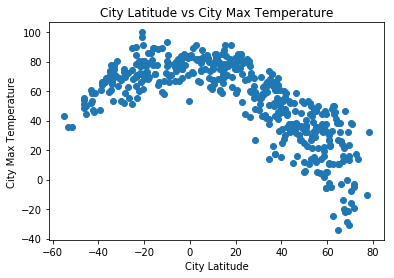

In [52]:
plt.scatter(CityLat, CityTemp)
plt.title("City Latitude vs City Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("City Max Temperature")

plt.savefig("MAXTEMPERATURE.png")

In [ ]:
Latitude vs Humidity

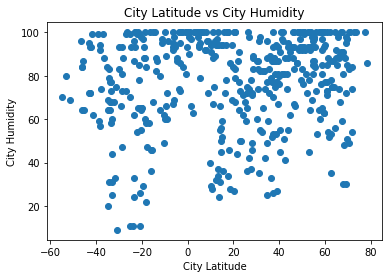

In [53]:
plt.scatter(CityLat, CityHumidity)
plt.title("City Latitude vs City Humidity")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")

plt.savefig("HUMIDITY.png")

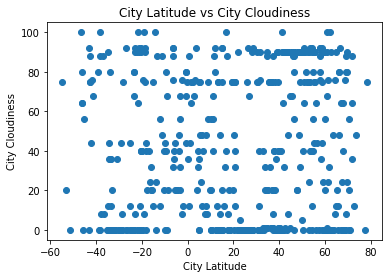

In [56]:
plt.scatter(CityLat, CityClouds)
plt.title("City Latitude vs City Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness")

plt.savefig("CLOUDINESS.png")

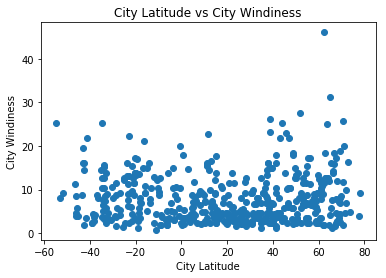

In [58]:
plt.scatter(CityLat, CityWind)
plt.title("City Latitude vs City Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("City Windiness")

plt.savefig("WINDSPEED.png")